In [1]:
# lll...

In [2]:
from koselleck import *

In [3]:
dfkw=get_keywords()
dfkw

,changes,explanation,in_author,process,change_type,from,toward,when,use,note_transl,Word,Wort
word,,,,,,,,,,,,
?,,,Koselleck,,,,,,,Separation of powers,?,Gewaltenteilung
?,,,Koselleck,,,,,,,,?,Stand
?,,,Koselleck,,,,,,,,?,Völkerrecht
?,,,Koselleck,,,,,,,,?,politischer Körper
?,,,Koselleck,,,,,,,,?,Obrigkeit
...,...,...,...,...,...,...,...,...,...,...,...,...
western,,,Williams,,,,,,,,Western,
work,Man-- Interp++ Freq+ Sing+ Virtue+ Pos+ Perc- ...,,Williams,,,,,,,,Work,
work,Man-- Interp++ Freq+ Sing+ Virtue+ Pos+ Perc- ...,,Koselleck,,,,,,,,Work,Arbeit


In [4]:
dfkw[dfkw['from']!=""]

,changes,explanation,in_author,process,change_type,from,toward,when,use,note_transl,Word,Wort
word,,,,,,,,,,,,
art,Strong++ Sing+ Pos+ Virtue+ Pleasure+ Time+ In...,"remarkably similar, in its pattern of change, ...",Williams,,,skill,"imagination, imaginative, creative, truth",around 1772,Y,,Art,
class,Freq++ Sing++ Perc-- Pos+ Interp+ Human+ Changed+,"Before this, the ordinary use of class, in Eng...",Williams,,,"division, sort, kind, group","low, lower, lowest, middling, middle, high, hi...",end of 18C,Y,,Class,
culture,Object-- Abs++ Pos+ Virtue+ Acad+ Interp+ Stro...,"The fifth, word, culture, similarly changes, i...",Williams,,,"growth, natural, tending, nature","society, habit, humanity, arts",19C,Y,,Culture,
democracy,Collective+ Polit+ Abs+ Freq+,"The second important word is democracy, which ...",Williams,,,people,mob,around 1776,Y,,Democracy,
genius,Ambig++ Strong++,"Genius, from meaning 'a characteristic disposi...",Williams,,,disposition,"ability, abilities",18C,Y,,Genius,
history,Man-- Sing+ Freq+ Ambig+,,"Williams, Koselleck",,,"story, narrative","past, present, future","Williams: ""From 15C"" Koselleck: in 18C, ""histo...",Y,,History,
industry,Passive-- Strong+ Acad+ Freq+,"The first important word is industry, and the ...",Williams,,,"skill, assiduity, perseverance, diligence","manufacture, production, institution",around 1776,Y,,Industry,
labour,Freq++ Passive-- Sing++ Acad+ Strong+ Changed+,"From C17, except in the special use for childb...",Williams,,,pain,"economy, commodity",From 17C ... gradually,Y,,Labour,
reform,Pleasure-- Polit++ Time++ Quant++ Pos-- Virtue...,In the struggle over Parliamentary representat...,Williams,,,"restoration, innovation","revival, correction, violent, radical, revolut...",lC18,Y,,Reform,


In [5]:
m=get_any_model()


In [6]:
def parse_directions(m,dfkw=None,words=None):
    if dfkw is None: dfkw=get_keywords()
    dfkw=dfkw.reset_index()
    dfkw=dfkw[dfkw['from']!=""]
    dfkw=dfkw[dfkw['toward']!=""]
    o=[]
    for i,row in dfkw.iterrows():
        toset=[w.strip() for w in row['toward'].split(',') if w.strip()]
        fromset=[w.strip() for w in row['from'].split(',') if w.strip()]
        try:
            vec2=compute_vector(m,words_pos=list(toset),words_neg=list(fromset))
            vec1=get_centroid(m, row.word)
            if vec1 is None or vec2 is None: continue
            csim=fastdist.cosine(vec1,vec2)
            odx={
               'word':row.word,
               'csim':csim
            }
            o.append(odx)
        except Exception as e:
#             print('!!',e)
            pass
    return pd.DataFrame(o).sort_values('csim')

In [7]:
# parse_directions(m)

In [9]:
# # dfdec=get_pathdf_models_bydecade()
# dfdec=get_pathdf_models().query('period_len==2 & run=="run_01"')
# dfdec

In [10]:
def do_parse_all_directions(df,**kwargs):
    m=load_model_row(df.iloc[0])
    return parse_directions(m,**kwargs)

def parse_all_directions(words=None):
    dfdec=get_pathdf_models_byyear().query('run=="run_01"')
    dfkw=get_keywords()
    return pmap_groups(
        do_parse_all_directions,
        dfdec.groupby(['period','run']),
        num_proc=2,
        kwargs=dict(dfkw=dfkw,words=words)
    ).groupby(['period','word']).mean().sort_values('csim')

In [11]:
# res=do_parse_all_directions(dfdec.iloc[:1])
# res

In [12]:
allres=parse_all_directions()
allres

Mapping do_parse_all_directions [x2]: 100%|██████████| 100/100 [00:23<00:00,  4.25it/s]


,,csim
period,word,
1780-1782,industry,-0.505958
1750-1752,industry,-0.489772
1782-1784,reform,-0.422956
1792-1794,industry,-0.420152
1750-1752,art,-0.394833
...,...,...
1792-1794,revolution,0.512357
1806-1808,revolution,0.518199
1834-1836,revolution,0.524217


In [13]:
allres.groupby('word').mean().sort_values('csim')

,csim
word,
history,-0.212568
democracy,-0.159840
art,-0.156721
culture,-0.094363
labour,-0.083933
class,-0.083665
industry,-0.040363
reform,-0.030878
genius,0.079784


In [14]:
figdf=allres.reset_index().merge(get_dfchange(), on='word',how='inner').merge(get_keywords(),on='word',how='inner')
figdf['period_int']=[int(x[:4]) for x in figdf.period]
figdf

,period,word,csim,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,...,process,change_type,from,toward,when,use,note_transl,Word,Wort,period_int
0,1780-1782,industry,-0.505958,3164.725,33.562697,-0.525382,1836.0,3892.8,3849.5,3080.6,...,,,"skill, assiduity, perseverance, diligence","manufacture, production, institution",around 1776,Y,,Industry,,1780
1,1750-1752,industry,-0.489772,3164.725,33.562697,-0.525382,1836.0,3892.8,3849.5,3080.6,...,,,"skill, assiduity, perseverance, diligence","manufacture, production, institution",around 1776,Y,,Industry,,1750
2,1792-1794,industry,-0.420152,3164.725,33.562697,-0.525382,1836.0,3892.8,3849.5,3080.6,...,,,"skill, assiduity, perseverance, diligence","manufacture, production, institution",around 1776,Y,,Industry,,1792
3,1782-1784,industry,-0.391909,3164.725,33.562697,-0.525382,1836.0,3892.8,3849.5,3080.6,...,,,"skill, assiduity, perseverance, diligence","manufacture, production, institution",around 1776,Y,,Industry,,1782
4,1746-1748,industry,-0.374679,3164.725,33.562697,-0.525382,1836.0,3892.8,3849.5,3080.6,...,,,"skill, assiduity, perseverance, diligence","manufacture, production, institution",around 1776,Y,,Industry,,1746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1466,1834-1836,revolution,0.524217,2615.450,45.095728,-0.349005,4099.9,2850.5,2025.5,1485.9,...,,,,,,,,Revolution,Revolution,1834
1467,1710-1712,revolution,0.533699,2615.450,45.095728,-0.349005,4099.9,2850.5,2025.5,1485.9,...,,,"cycle, movement, turning, rotation","rebellion, change, rebel",early 17C,Y,,Revolution,,1710
1468,1710-1712,revolution,0.533699,2615.450,45.095728,-0.349005,4099.9,2850.5,2025.5,1485.9,...,,,,,,,,Revolution,Revolution,1710
1469,1782-1784,revolution,0.536452,2615.450,45.095728,-0.349005,4099.9,2850.5,2025.5,1485.9,...,,,"cycle, movement, turning, rotation","rebellion, change, rebel",early 17C,Y,,Revolution,,1782


In [15]:
figdf=figdf[figdf.toward!=""]
figdf=figdf[figdf["toward"]!=""]
# figdf['desc']=figdf.apply(lambda row: f'{row.word} ({row["from"].split(",")[0]}-->{row.toward.split(",")[0]})', axis=1)
figdf['desc']=figdf.apply(lambda row: f'{row["from"].split(",")[0]} --> {row.toward.split(",")[0]}', axis=1)
figdf['desc']

0       skill --> manufacture
1       skill --> manufacture
2       skill --> manufacture
3       skill --> manufacture
4       skill --> manufacture
                ...          
1461      cycle --> rebellion
1463      cycle --> rebellion
1465      cycle --> rebellion
1467      cycle --> rebellion
1469      cycle --> rebellion
Name: desc, Length: 972, dtype: object

In [16]:
figdf[figdf.toward==""]

,period,word,csim,rank,perc,dist,rank_abstractness,rank_noiseaware,rank_procrustes,rank_local,...,change_type,from,toward,when,use,note_transl,Word,Wort,period_int,desc


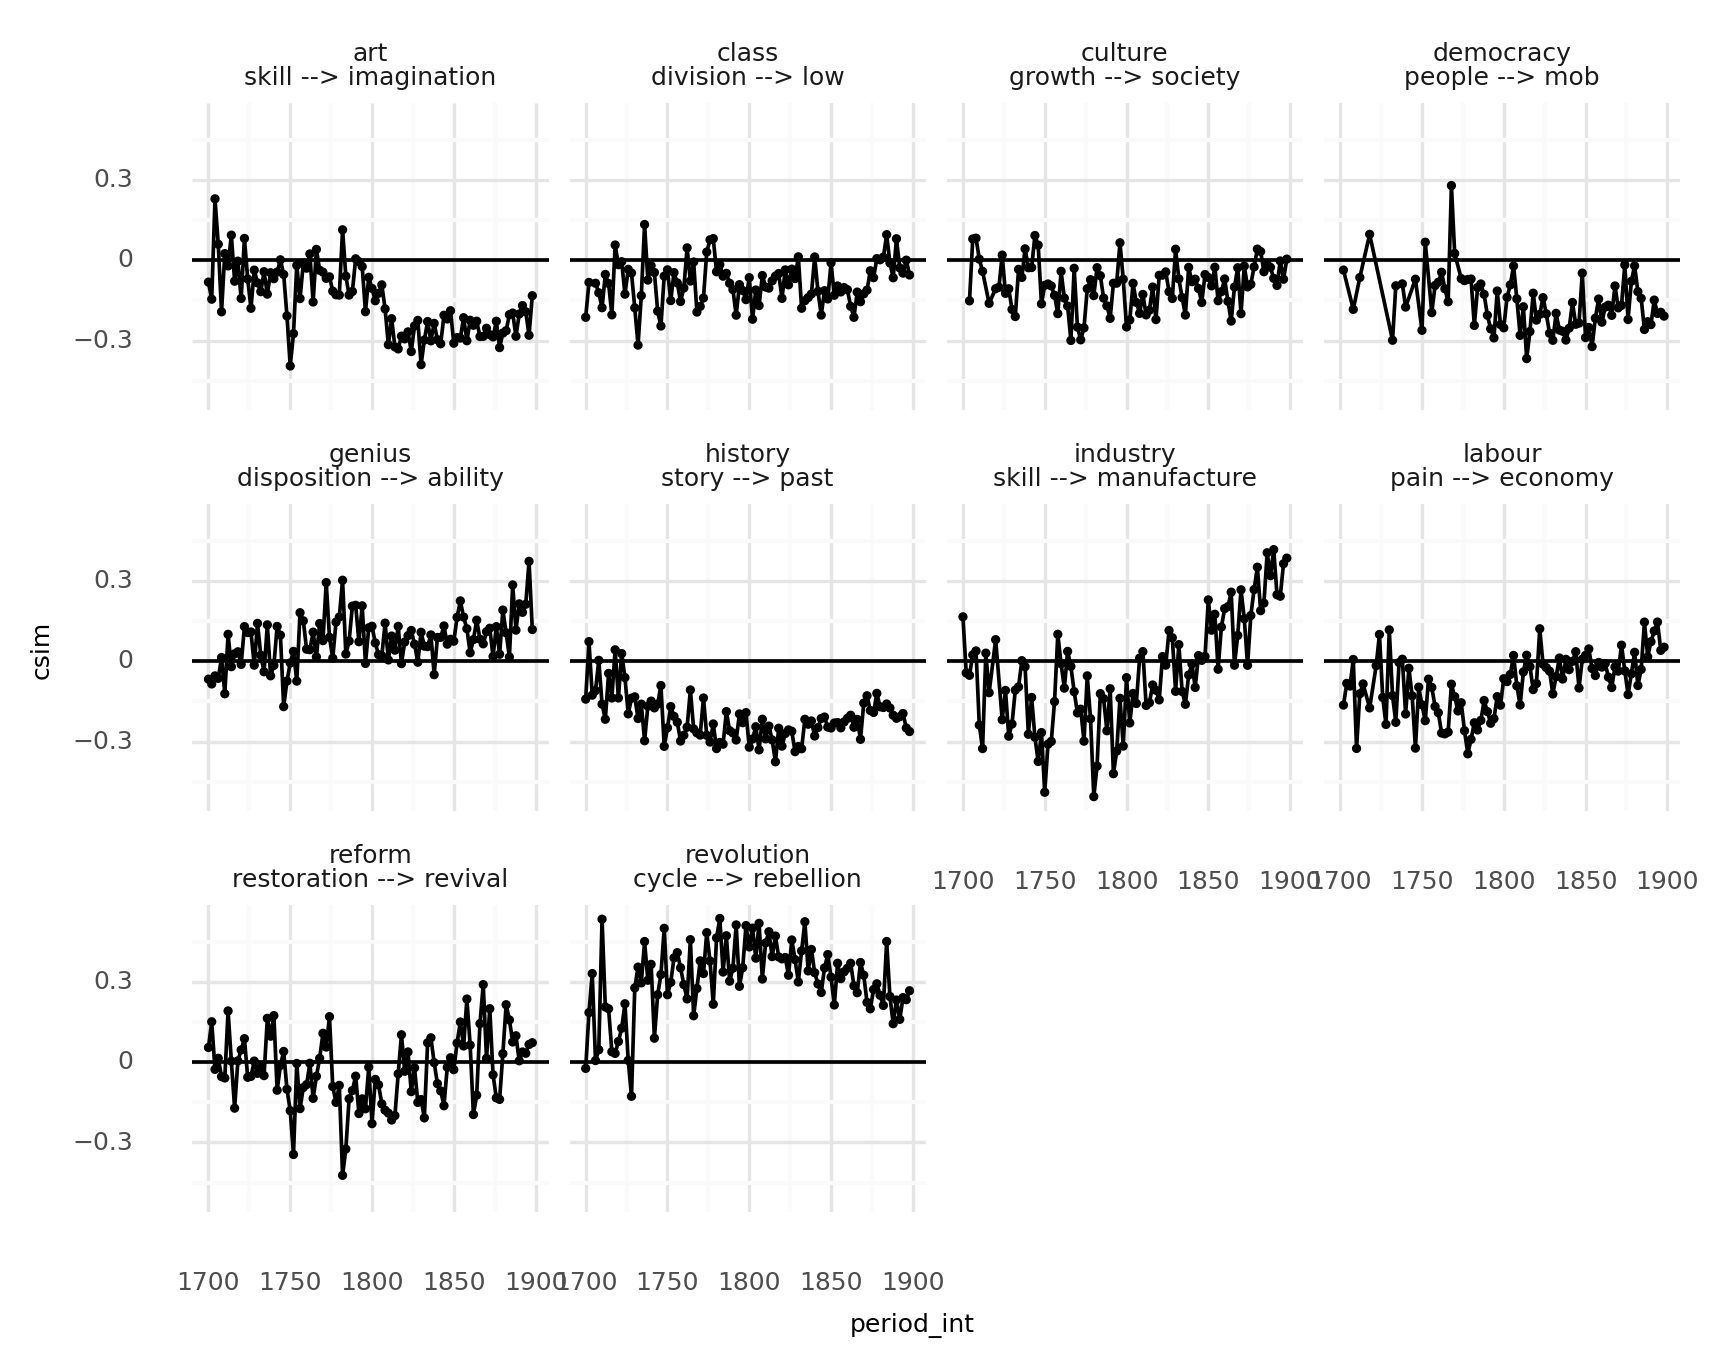

<ggplot: (8788464630149)>

In [17]:
fig=p9.ggplot(figdf, p9.aes(x='period_int', y='csim'))
fig+=p9.geom_hline(yintercept=0)
fig+=p9.geom_line()
fig+=p9.geom_point(size=0.25)
fig+=p9.facet_wrap('~ word + desc')
fig+=p9.theme_minimal()
fig+=p9.theme(text=p9.element_text(size=6))
fig

In [17]:
get_classed_changes()

,word,vector,change,mean1,mean2,mean_diff,mean_diff_t,mean_diff_p,mean_diff_t_abs,len1,...,neighborhood1_local,neighborhood2_local,score_diff_t_abstractness,score_diff_p_abstractness,class_abs,class_change,class_signif,class,mean_diff_abs,change_rank
199,bouquet,Woman-Man.VG,Woman+++,-1.329772,2.895461,4.225233,-86.839694,1.130192e-154,86.839694,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.225233,3
1422,filter,Human-Object.VG,Object+++,1.363295,-2.793916,-4.157210,51.701545,1.441505e-101,51.701545,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.157210,3
1417,jockey,Woman-Man.VG,Man+++,1.013478,-3.085249,-4.098727,51.798428,6.252449e-112,51.798428,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.098727,3
157,canning,Woman-Man.VG,Man+++,1.788195,-2.293661,-4.081855,92.252691,1.092458e-156,92.252691,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.081855,3
874,misery,Pleasure-Pain.HGI,Pain+++,1.478367,-2.551010,-4.029377,59.160838,3.215793e-118,59.160838,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.029377,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3208,waist,NaN,~Noisy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"forehead (10), girdle (10), feather (10), -hai...","sleeve (10), girdle (10), collar (10), neck (1...",-5.152688,6.679332e-05,Abs~Conc,~Noisy,False,Abs~Conc ~Noisy,NaN,0
3538,exportation,NaN,~Noisy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"importation (10), -drawback (10), wool (10), e...","export (10), importation (10), merchandise (10...",7.413326,7.124534e-07,Abs~Conc,~Noisy,False,Abs~Conc ~Noisy,NaN,0
3870,foliage,NaN,~Noisy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"verdure (10), -crystal (10), plumage (10), fra...","verdure (10), +vegetation (10), beech (10), pl...",-4.487022,2.850442e-04,Abs~Conc,~Noisy,False,Abs~Conc ~Noisy,NaN,0
4260,enquiry,NaN,~Noisy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"inquiry (10), examination (10), admission (10)...","inquiry (10), investigation (10), controversy ...",0.166834,8.693607e-01,Abs~Conc,~Noisy,False,Abs~Conc ~Noisy,NaN,0


In [18]:
dfkw.loc['labour']

changes           Freq++ Passive-- Sing++ Acad+ Strong+ Changed+
explanation    From C17, except in the special use for childb...
in_author                                               Williams
process                                                         
change_type                                                     
from                                                        pain
toward                                        economy, commodity
when                                      From 17C ... gradually
use                                                            Y
note_transl                                                     
Word                                                      Labour
Wort                                                            
Name: labour, dtype: object